Enter a complex number please ex: -0.75+0.25j: -0.75+0.25j


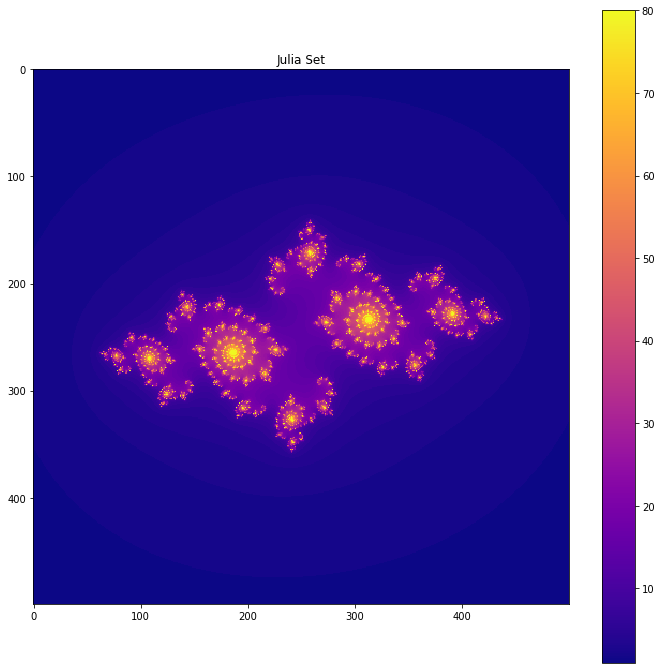

In [3]:
'''
    This script plots the Julia Set for Z = Z^2 + C where C is any inputted complex value.
'''

import numpy as np
import matplotlib.pyplot as plt

# Constans
'''
    Cutoff Limit: The higher this value is, the more detailed the plot will be. If the number of steps 
                  goes above this number it is said to diverge and not be in the Julia Set.
            Rows: Determines the amount of pixels in the x axis
         Columns: Determines the amount of pixels in the y axis
         
    The higher any of these values is, the longer it will take to compute, but it will be more detailed.

'''
cutOffLimit = 80 
rows = 500
columns = 500

# Other variables
x = np.linspace(-2, 2, rows) # The Real axis from -2 to 2
y = np.linspace(-2, 2, columns) # The Imaginary Axis from -2 to 2
matrix = np.zeros((rows,columns)) # Empty Matrix to be plotted with newValues
fig = plt.figure(figsize=(12,12)) # Figure size


# Helper Functions

'''
    Takes in a complex number Z from the plane. A inputted complex value C, and the cutoff limit.
    It returns an int numofSteps to be plotted.
'''
def Julia(Z, C, cutOffLimit):
    numofSteps = 0
    while numofSteps < cutOffLimit and abs(Z) <= 4:
        Z = Z**2 + C
        numofSteps += 1
    return numofSteps
    
# Script

C = complex(input("Enter a complex number please ex: -0.75+0.25j: "))

for i in range(rows):
    for j in range(columns):
        # make complex number from the point on the plot
        z = complex(x[i], y[j])
        # calculate the numOfSteps it takes for the complex point to diverge.
        newValue = Julia(z, C, cutOffLimit)
        # Place that value into the empty matrix
        matrix[j,i] = newValue
# Plots the matrix of new values.
plt.title("Julia Set")
plt.imshow(matrix, cmap='plasma')
plt.colorbar()


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
done


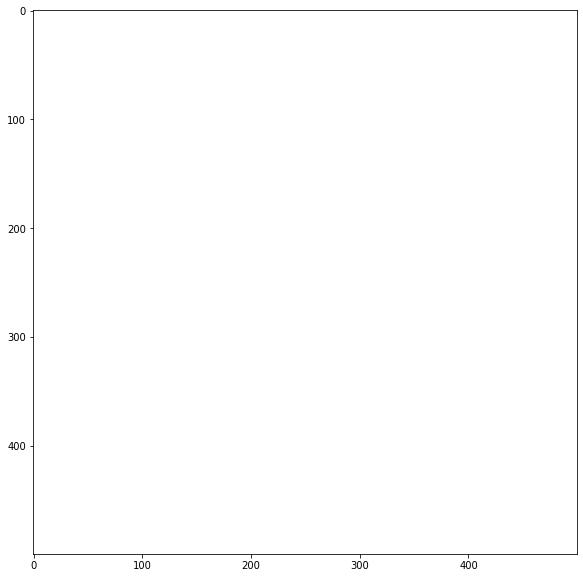

In [3]:
'''
    This script plots the Julia Set for Z = Z^2 + 0.7885e^(i*a) where a ranges from o to 2pi, and then 
    makes a gif of the changing values. 
'''

%reset
import numpy as np
import math
from math import e
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# Constants
cutoffLimit = 80
rows = 500
columns = 500
fig = plt.figure(figsize=(10,10))

Round = np.linspace(0, 2*math.pi, 500)

ims = [] # ims is a list of lists, each row is a list of artists to draw in the current 
         # frame; here we are just animating one artist, the image, in each frame

# Helper functions
def Julia(Z, C, cutOffLimit):
    numofSteps = 0
    while numofSteps < cutOffLimit and abs(Z) <= 4:
        Z = Z**2 + 0.7885*e**(complex(0,C))
        numofSteps += 1
    return numofSteps

# Script
for Values in Round:
    X = np.linspace(-2,2,rows)
    Y = np.linspace(-2,2,columns)

    xlen = len(X) #a list for which number of elements to be counted
    ylen = len(Y)

    twoD_Matrix = np.zeros((xlen,ylen)) # the 2D Matrix 

    for i in range(rows):
        for j in range(columns):
            z = complex(X[i], Y[j])
            newValue = Julia(z, Values, cutoffLimit)
            twoD_Matrix[j,i] = newValue
        
    im = plt.imshow(twoD_Matrix, cmap = 'plasma', animated=True )
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=75, blit=False, repeat_delay=1000)
writergif = animation.PillowWriter(fps=30) 
ani.save("animationHighQuality.gif", writer=writergif)
print("done")